In [1]:
import numpy as np
import pandas as pd

## para a visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('populacao_brasileira.csv')

In [3]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [4]:
df.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


In [5]:
# df.dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [6]:
df = df.rename(columns={'Unnamed: 0':'index'})

## 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quemtemonível avançado.

In [7]:
fluentes = df.groupby(['nível de proficiência em inglês'])['index'].count()

fluentes_avancado = fluentes['Avançado']

fluentes_avancado

344

In [8]:
probabilidade_fluentes = fluentes_avancado/df['nível de proficiência em inglês'].count()

probabilidade_fluentes

0.344

A probabilidade disso ocorrer é de 0.344%

## 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [9]:
amapa_para = df[(df['estado'] == 'AP') | (df['estado'] == 'PA')]

amapa_para['estado'].count()

86

In [10]:
renda = amapa_para['renda'].where(amapa_para['renda'] > 5000).count()

renda

4

In [11]:
probabilidade_renda_maior_5000 = renda/amapa_para['renda'].count()

probabilidade_renda_maior_5000

0.046511627906976744

A probabilidade de ser do Amapa ou Para com renda maior que 5000 é: 0.046%

## 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

Evento complementar de E é o conjunto formado por todos os elementos do espaço amostral que não pertencem a E

In [12]:
pessoas_AM = df[df['estado'] == 'AM']

pessoas_AM['index'].count()

38

In [13]:
escolaridade = pessoas_AM[(pessoas_AM['escolaridade'] == 'Superior') | (pessoas_AM['escolaridade'] == 'Pós-graduação') ]['escolaridade'].count()

escolaridade

21

In [14]:
probabilidade_superior_AM = escolaridade/pessoas_AM['escolaridade'].count()
probabilidade_superior_AM

0.5526315789473685

A probabilidade de uma pessoa do Amazonas ter o ensino superior é de: 0.553%

### Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [15]:
prob_complementar = 1 - probabilidade_superior_AM
prob_complementar

0.4473684210526315

In [16]:
prob_5_pessoa =  prob_complementar**(4) * probabilidade_superior_AM
prob_5_pessoa

0.022135890467222828

A probabilidade disso ocorrer é de: 0.0221%

Com o uso de funções: 

A função **binom.pmf(k, n, p)** na biblioteca scipy.stats é usada para calcular a probabilidade de um número específico de sucessos (k) em um número fixo de tentativas (n), seguindo uma distribuição binomial com uma probabilidade de sucesso (p).

k: Número de sucessos desejados.

n: Número total de tentativas (ou ensaios).

p: Probabilidade de sucesso em cada tentativa.

In [17]:
from scipy.stats import binom

probabilidade = binom.pmf(1, 5, probabilidade_superior_AM)
probabilidade

0.11067945233611416

### Distribuicao geométrica
'k' é o número de tentativas até o primeiro sucesso.

'p' é a probabilidade de sucesso em uma única tentativa.

Na biblioteca scipy.stats, você pode usar a função geom.pmf(k, p) para calcular a probabilidade de obter exatamente k tentativas até o primeiro sucesso, dadas as condições especificadas pela probabilidade de sucesso 
p.

In [18]:
from scipy.stats import geom

probabilidade = geom.pmf(5, probabilidade_superior_AM)
probabilidade

0.022135890467222828

## 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [19]:
# Calcular o número de faixas de renda
min_renda = df['renda'].min()
max_renda = df['renda'].max()
numero_faixas = int((max_renda - min_renda) / 1500) + 1

numero_faixas

4

In [20]:
faixas = ['0 a 1500', '1500 a 3000', '3000 a 4500', '4500 a 6000']
faixas_renda = pd.cut(df['renda'], bins=numero_faixas, labels=faixas, include_lowest=True)

print(faixas_renda.value_counts().sort_index())


renda
0 a 1500        54
1500 a 3000    362
3000 a 4500    464
4500 a 6000    120
Name: count, dtype: int64


In [21]:
# Contar o número de pessoas em cada faixa de renda
contagem_por_faixa = faixas_renda.value_counts().sort_index()

# Determinar em qual faixa de renda a maioria das pessoas se encontra
faixa_mais_comum = contagem_por_faixa.idxmax()

# Calcular a função densidade de probabilidade (PDF) da renda
pdf_renda = contagem_por_faixa / len(df)

print("Faixa de renda mais comum:", faixa_mais_comum)
print("Função densidade de probabilidade (PDF) da renda:")
print(pdf_renda)

Faixa de renda mais comum: 3000 a 4500
Função densidade de probabilidade (PDF) da renda:
renda
0 a 1500       0.054
1500 a 3000    0.362
3000 a 4500    0.464
4500 a 6000    0.120
Name: count, dtype: float64


## 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


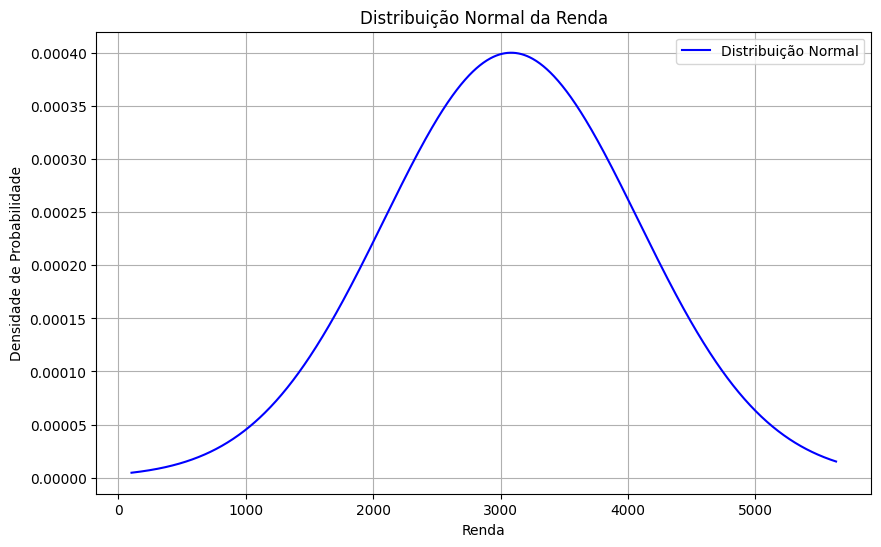

In [22]:
from scipy.stats import norm

# Calcular a média e a variância da renda da amostra
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print("Média da renda:", media_renda)
print("Variância da renda:", variancia_renda)

# Criar a distribuição normal usando a média e a variância da renda
renda_min = df['renda'].min()
renda_max = df['renda'].max()
renda_range = np.linspace(renda_min, renda_max, 1000)
pdf_normal = norm.pdf(renda_range, loc=media_renda, scale=np.sqrt(variancia_renda))

# Plotar o gráfico da distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(renda_range, pdf_normal, label='Distribuição Normal', color='blue')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

## 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [24]:
escolaridade_pos_graduacao = df[df['escolaridade'] == 'Pós-graduação']
escolaridade_pos_graduacao

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
11,11,SC,41,Pós-graduação,Intermediário,2396.01,M
15,15,GO,20,Pós-graduação,Básico,3254.42,M
16,16,RO,39,Pós-graduação,Básico,3337.60,M
18,18,MS,41,Pós-graduação,Avançado,2512.39,F
19,19,SP,61,Pós-graduação,Básico,2567.44,F
...,...,...,...,...,...,...,...
987,987,PA,28,Pós-graduação,Avançado,4088.75,M
988,988,SC,53,Pós-graduação,Básico,4884.59,F
992,992,DF,50,Pós-graduação,Básico,3140.89,F
994,994,DF,27,Pós-graduação,Avançado,3323.17,F


In [26]:
## Probabilidade de ter pos graduação nos dados de populacao_brasileira.csv
probabilidade_pos_graducao = escolaridade_pos_graduacao['index'].count()/df['index'].count()
probabilidade_pos_graducao

0.253

Com o uso de funções: 

A função **binom.pmf(k, n, p)** na biblioteca scipy.stats é usada para calcular a probabilidade de um número específico de sucessos (k) em um número fixo de tentativas (n), seguindo uma distribuição binomial com uma probabilidade de sucesso (p).

k: Número de sucessos desejados.

n: Número total de tentativas (ou ensaios).

p: Probabilidade de sucesso em cada tentativa.

In [29]:
from scipy.stats import binom

# Definindo os parâmetros
n = 1000000  # população brasileira
k = 243000    # pessoas com pós-graduação
p = 0.243     # probabilidade de uma pessoa ter pós-graduação (suposição)

# Calculando a probabilidade usando a função binom.pmf
probabilidade = binom.pmf(k, n, p)

print("A probabilidade de encontrar 243.000 pessoas com pós-graduação é de aproximadamente {:.2f}%".format(probabilidade * 100))


A probabilidade de encontrar 243.000 pessoas com pós-graduação é de aproximadamente 0.09%


## 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [46]:
separacao_nivel_escolaridade = pd.DataFrame(df.groupby('escolaridade').count()['index'])
separacao_nivel_escolaridade

,index
escolaridade,
Fundamental,266
Médio,238
Pós-graduação,253
Superior,243


In [50]:
# freq = pd.DataFrame(separacao_nivel_escolaridade.value_counts(bins=4, sort=False))
# freq

# Calcular a proporção de ocorrências acumuladas
densidade_acumulada = separacao_nivel_escolaridade.copy()

densidade_acumulada ['densidade acumulada'] = separacao_nivel_escolaridade.cumsum()
# densidade_acumulada = separacao_nivel_escolaridade.cumsum()

densidade_acumulada.rename(columns={'index':'densidade'}, inplace=True)

print("Densidade acumulada discreta para cada nível de escolaridade:")
print(densidade_acumulada)

Densidade acumulada discreta para cada nível de escolaridade:
               densidade  densidade acumulada
escolaridade                                 
Fundamental          266                  266
Médio                238                  504
Pós-graduação        253                  757
Superior             243                 1000


## 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [55]:
nivel_ingles_intermediario = df[df['nível de proficiência em inglês'] == 'Intermediário']
nivel_ingles_intermediario

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
2,2,AM,32,Fundamental,Intermediário,3835.69,M
6,6,DF,56,Médio,Intermediário,528.36,F
10,10,AC,28,Superior,Intermediário,3371.15,M
11,11,SC,41,Pós-graduação,Intermediário,2396.01,M
...,...,...,...,...,...,...,...
984,984,AP,31,Médio,Intermediário,2773.52,F
985,985,ES,55,Fundamental,Intermediário,2040.56,M
990,990,TO,60,Fundamental,Intermediário,2511.15,M
997,997,GO,27,Pós-graduação,Intermediário,1405.30,F


In [67]:
import math

# confianca = 0.95 ## Confianca
z = 1.96  # Valor z para um nível de confiança de 95%
n = df['index'].count()
p = nivel_ingles_intermediario['index'].count()/df['index'].count()
# print(f'Proporcao: {p}')
margin_of_error = z * math.sqrt((p * (1 - p)) / n)

print(f'Margem de erro: {margin_of_error}')

Margem de erro: 0.029121603225097343


## 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [76]:
from scipy.stats import norm, binom
import numpy as np

media_renda_populacao = df['renda'].mean()
desvio_padrao = df['renda'].std()

print(f'Média: {media_renda_populacao} | Desvio Padão: {desvio_padrao}')

prob = 1 - norm.cdf(media_renda_populacao+1000, loc=media_renda_populacao, scale=desvio_padrao)

# Probabilidade de uma pessoa ter renda superior a R$ 4000 multiplicada pelo número total de pessoas
prob_renda_superior_a_media = prob * df['index'].count()

# Probabilidade de encontrar exatamente 60 pessoas com renda superior a R$ 4000
prob_60_pessoas = binom.pmf(60, df['index'].count(), prob)


print("Probabilidade de uma pessoa ter renda superior a R$ 4000:", prob)
print("Número esperado de pessoas com renda superior a R$ 4000:", prob_renda_superior_a_media)
print("Probabilidade de encontrar exatamente 60 pessoas com renda superior a R$ 4000:", prob_60_pessoas)

Média: 3082.5371800000003 | Desvio Padão: 996.572239312141
Probabilidade de uma pessoa ter renda superior a R$ 4000: 0.15782441468557806
Número esperado de pessoas com renda superior a R$ 4000: 157.82441468557806
Probabilidade de encontrar exatamente 60 pessoas com renda superior a R$ 4000: 1.1597038406785185e-21


## 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [79]:
homem_sudeste_ensinoFundamenta_rendaMaior2000 = df[(df['sexo'] == 'M') ]

homem_sudeste_ensinoFundamenta_rendaMaior2000 = homem_sudeste_ensinoFundamenta_rendaMaior2000[homem_sudeste_ensinoFundamenta_rendaMaior2000['estado'].isin(['SP', 'MG', 'RJ', 'ES'])]

homem_sudeste_ensinoFundamenta_rendaMaior2000 = homem_sudeste_ensinoFundamenta_rendaMaior2000[homem_sudeste_ensinoFundamenta_rendaMaior2000['escolaridade'] == 'Fundamental']

homem_sudeste_ensinoFundamenta_rendaMaior2000 = homem_sudeste_ensinoFundamenta_rendaMaior2000[homem_sudeste_ensinoFundamenta_rendaMaior2000['renda'] > 2000]

display(homem_sudeste_ensinoFundamenta_rendaMaior2000)


prob_homens = homem_sudeste_ensinoFundamenta_rendaMaior2000['index'].count() / df['index'].count()

print(f"A probabilidade de escolher alguem do sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é: {prob_homens}")

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
155,155,ES,32,Fundamental,Intermediário,3615.94,M
163,163,ES,45,Fundamental,Básico,4049.01,M
205,205,ES,19,Fundamental,Avançado,3026.09,M
301,301,SP,50,Fundamental,Avançado,2786.01,M
505,505,SP,18,Fundamental,Básico,2961.49,M
524,524,MG,27,Fundamental,Intermediário,4148.77,M
612,612,RJ,19,Fundamental,Intermediário,2008.61,M
626,626,RJ,21,Fundamental,Intermediário,4022.57,M
680,680,ES,29,Fundamental,Intermediário,2164.65,M
732,732,MG,50,Fundamental,Intermediário,4091.31,M


A probabilidade de escolher alguem do sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é: 0.019
